<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ec_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ecuaciones de una variable:

Para los siguiente problemas:


1.0 ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

- Muestre que la expresión que permite resolver el problema:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- ¿Construya una grafica para theta?,  Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior

In [17]:
# Encontrar raíces mediante librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

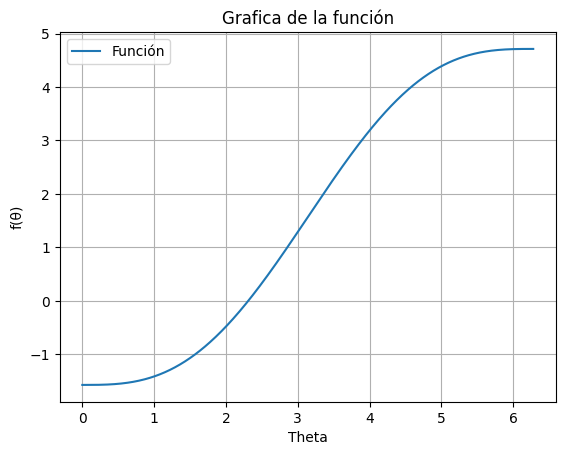

In [18]:
theta = lambda x: x - np.sin(x) - np.pi/2
dtheta = lambda x: 1 - np.cos(x)

x = np.arange(0, 2*np.pi, 0.01)
y = theta(x)  # Variar theta iterativamente

d = {'Theta':x, 'Función':y} # Serie
df = pd.DataFrame(d)  # Data frame

df.plot.line(x = 'Theta', y = 'Función')
plt.title('Grafica de la función')
plt.ylabel('f(θ)')
plt.legend()
plt.grid()
plt.show()

In [19]:
# Encontrar las raíces de la función
# Dentro del datafram se puede hacer un filro para buscar los valores cercanos al cero
df_filtro=df[df.Función.between(-0.1, 0.1)]
df_filtro

,Theta,Función
225,2.25,-0.098870
226,2.26,-0.082549
227,2.27,-0.066151
228,2.28,-0.049677
229,2.29,-0.033127
230,2.30,-0.016502
231,2.31,0.000198
232,2.32,0.016972
233,2.33,0.033819
234,2.34,0.050739


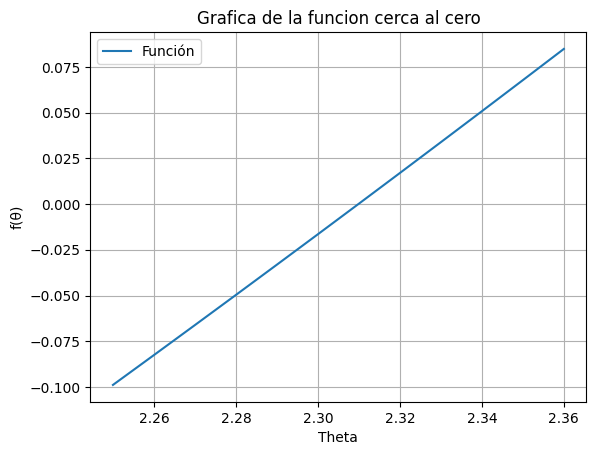

In [20]:
plt.plot(df_filtro['Theta'], df_filtro['Función'], label = 'Función') # A ojo podemos ver donde está el cero de la función
plt.title('Grafica de la funcion cerca al cero')
plt.xlabel('Theta')
plt.ylabel('f(θ)')
plt.legend()
plt.grid()
plt.show()

In [21]:
raiz = optimize.bisect(theta, 2.30, 2.31)  # Función # Intervalo  # Siempre se debe evaluar el intervalo en un cambio de signo
print('La raíz usando el método de bisección es', raiz)

raiz_newton = optimize.newton(theta, 2.30, dtheta)
print('La raíz usando el método de Newton-Rhapson es', raiz_newton)

fixed_theta = lambda x: x - theta(x)

raiz_fijo = optimize.fixed_point(fixed_theta, 2.30) # Recursividad al rededor de un punto
print('La raíz usando el método de Punto-fijo es', raiz_fijo)

# Método de secante  #mismo método de newton, no es necesario meterle la derivada
raiz_secante = optimize.newton(theta, 2.30)
print('La raíz usando el método de la secante es', raiz_secante)

La raíz usando el método de bisección es 2.3098814600089104
La raíz usando el método de Newton-Rhapson es 2.309881460010057
La raíz usando el método de Punto-fijo es 2.3098814600100575
La raíz usando el método de la secante es 2.3098814600100575


2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.


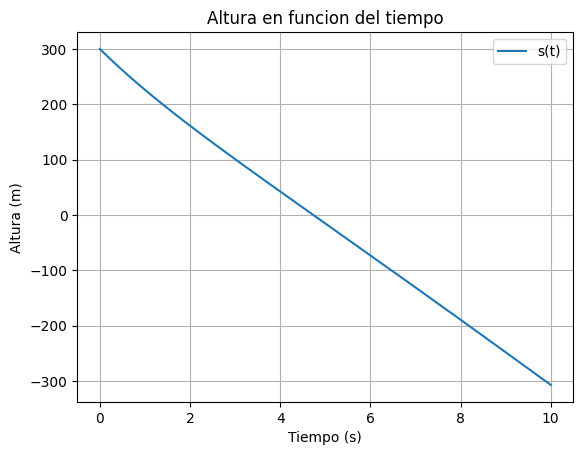

In [73]:
# Definimos nuestras variables
s0 = 300
g = 32.17
k = 0.1
m = 0.25

# Creamos la funcion que calcula la altura
s = lambda t: s0 - (m * g * t) / k + ((m**2 * g) / k) * t * (1 - np.exp(-(k*t)/m))

# Graficamos el comportamiento de s(t)
t = np.arange(0, 10, 0.0001)


plt.title('Altura en funcion del tiempo')
plt.plot(t, s(t), label = 's(t)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura (m)')
plt.legend()
plt.grid()

In [74]:
# Creamos un Data Frame de los datos y lo filtramos para acercarnos al punto donde esta el cero
d = {'t':t, 's':s(t)} # Serie
df = pd.DataFrame(d)  # Data frame

df_filtro=df[df.s.between(-0.01, 0.01)]
df_filtro

,t,s
47360,4.7360,0.008016
47361,4.7361,0.002255
47362,4.7362,-0.003507
47363,4.7363,-0.009268


Por lo que el cero de la funcion esta en $4.73 ± 0.01$

In [75]:
# Comparamos nuestro resultado con el obtenido usando los 4 metodos para encontrar raices

print('La raíz usando el método de bisección es', optimize.bisect(s, 4.72, 4.74))

# Definimos la funcion para el metodo del punto fijo
f = lambda x: x - s(x)

print('La raíz usando el método de Punto-fijo es', optimize.fixed_point(f, 4.72))

# Calculamos la derivada de s para usar el metodo de Newton-Rhapson
ds = lambda t: -(m * g) / k + ((m**2 * g) / k) * (1 - np.exp(-(k*t)/m)) + ((m**2 * g) / k) * t * ((-k*t/m)*np.exp(-(k*t)/m))

print('La raíz usando el método de Newton-Rhapson es', optimize.newton(s, 4.72, ds))

print('La raíz usando el método de la secante es', optimize.newton(s, 4.72))

La raíz usando el método de bisección es 4.736139137604041
La raíz usando el método de Punto-fijo es 4.73613913760349
La raíz usando el método de Newton-Rhapson es 4.736139133526875
La raíz usando el método de la secante es 4.736139137603489


3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.


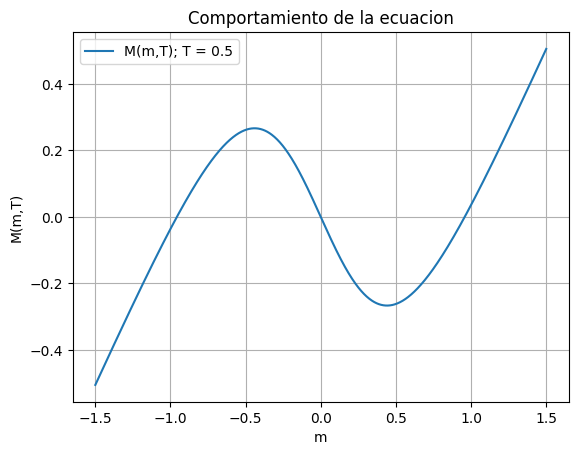

In [58]:
# Definimos la temperatura y la funcion a la que queremos calcular el cero para hallar m(T)
T = 0.5

def M(m,T):
  M = m - np.tanh(m/T)

  return M

# Graficamos nuestra funcion para tener una idea de donde estan los ceros y asi usar un x0 adecuado
x = np.linspace(-1.5, 1.5, 1000)

plt.title('Comportamiento de la ecuacion')
plt.plot(x, M(x,T), label = 'M(m,T); T = 0.5')
plt.xlabel('m')
plt.ylabel('M(m,T)')
plt.legend()
plt.grid()

In [33]:
# La funcion tiene 3 ceros, los calculamos usando el metodo de la secante
r1 = optimize.newton(M, -21, args = (T,))
r2 = optimize.newton(M, 0.1, args = (T,))
r3 = optimize.newton(M, 21, args = (T,))

print(f'La magnetizacion reducida para una temperatura de 0.5 puede tener los siguientes valores: [{r1:.4}, {r2:.4}, {r3:.4}]')

La magnetizacion reducida para una temperatura de 0.5 puede tener los siguientes valores: [-0.9575, 6.373e-16, 0.9575]


In [49]:
# Comparamos usando el metodo del punto fijo
p = lambda x,T: x - M(x,T)

r1 = optimize.fixed_point(p, -21, args = (T,))
r2 = optimize.fixed_point(p, 0.1, args = (T,))
r3 = optimize.fixed_point(p, 21, args = (T,))

print(f'La magnetizacion reducida para una temperatura de 0.5 puede tener los siguientes valores: [{r1:.4}, {r2:.4}, {r3:.4}]')

La magnetizacion reducida para una temperatura de 0.5 puede tener los siguientes valores: [-0.9575, 0.0, 0.9575]


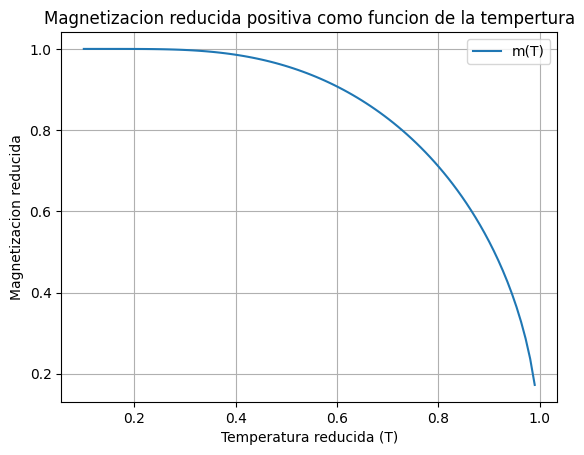

In [63]:
# Graficamos la magnetizacion reducida positiva en funcion de la temperatura
T1 = np.linspace(0.1, 0.99, 100)
mag = np.zeros_like(T1)

c = 0 # Contador
for i in T1:
  mag[c] = optimize.newton(M, 21, args = (i,)) # Metodo de la secante
  c += 1

plt.title('Magnetizacion reducida positiva como funcion de la tempertura')
plt.plot(T1, mag, label = 'm(T)')
plt.xlabel('Temperatura reducida (T)')
plt.ylabel('Magnetizacion reducida')
plt.legend()
plt.grid()

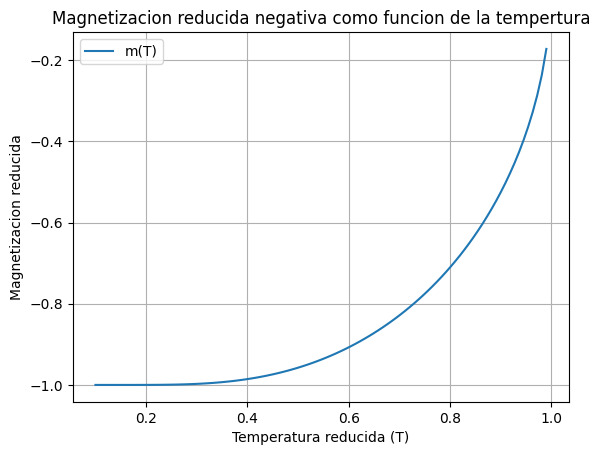

In [64]:
# Graficamos la magnetizacion reducida negativa en funcion de la temperatura
magn = np.zeros_like(T1)

cn = 0
for i in T1:
  magn[cn] = optimize.newton(M, -21, args = (i,))
  cn += 1

plt.title('Magnetizacion reducida negativa como funcion de la tempertura')
plt.plot(T1, magn, label = 'm(T)')
plt.xlabel('Temperatura reducida (T)')
plt.ylabel('Magnetizacion reducida')
plt.legend()
plt.grid()

5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}


Replicar el codigo y entender.


```

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```


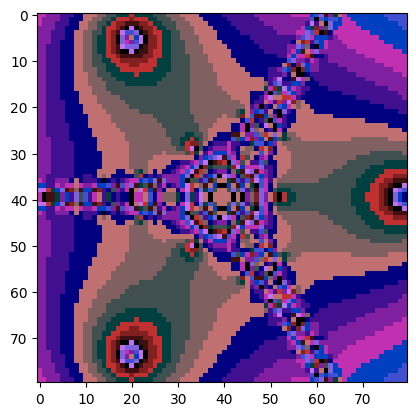

In [67]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
# Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

# Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break

        Z_0 = Z

      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16

      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)